<a href="https://colab.research.google.com/github/WenyuCho/Generative-AI/blob/main/Homework/GenAI_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **主題二**.



# 1.GAN原理概念 :
正版鞋 vs 盜版鞋

盜版鞋店( **Generator** ) : 致力於做出愈逼真的盜版鞋。

球鞋鑑定專家( **Discriminator** ) : 負責鑑定鞋子的真假。



---



而整個GAN訓練過程:

盜版鞋店做假鞋的功力隨時間愈來愈強，專家也要努力提高辨別假鞋的能力，

最終盜版鞋店將學會如何做出逼真的盜版鞋。

---



1.   **Cross Entropy**  =  專家鑑定鞋子真假的失誤程度。


*   Cross Entropy 愈小 ----> 專家分辨真假能力愈強。
*   Cross Entropy 愈大 ----> 專家分辨真假能力愈弱。


2.   **KL Divergence** = 正版鞋與盜版鞋的整體特徵差距。

*   KL Divergence 愈小 ----> 盜版鞋整體品質愈接近正版鞋。
*   KL Divergence 愈大 ----> 盜版鞋跟正版鞋整體差很多，一下就被發現。



---








# 2.兩者用法與差異及補充



 :
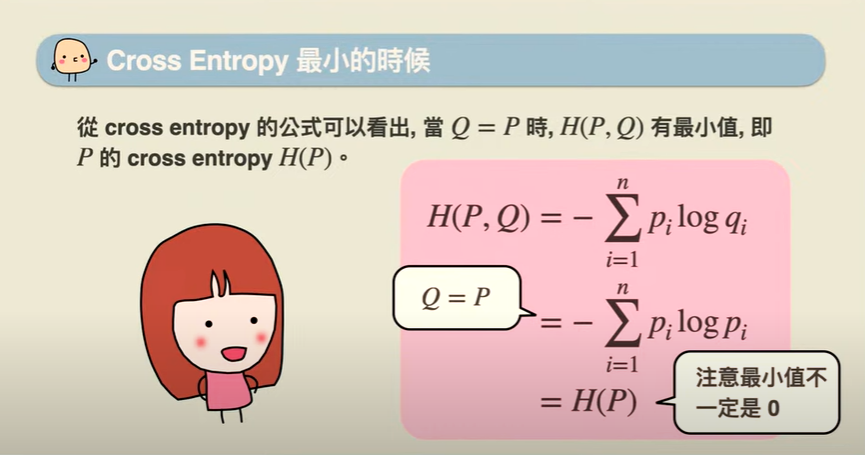

這邊我想補充說明老師講的，以假鞋的例子解釋 :

假設今天有一雙"正版鞋"當成標準來模仿，
做的盜版鞋跟正版鞋越像，Cross Entropy 越小，代表仿冒得越成功，

而當盜版鞋完全仿得跟正版鞋一模一樣時（也就是 Q=P 的時候），
Cross Entropy 會變成「最小值」。

而為甚麼這個最小值不一定等於0，以下我舉例說明:


1.   Nike Dunk 鞋款就有許多配色(數十種以上)，如果問甚麼才是正版Nike Dunk 鞋款的標準外觀？

這種時候，「正版鞋」本身就具備不確定性或多樣性，所以就算把所有正版Dunk都完美地仿製了一遍，

 Cross Entropy 也不可能為 0，而是等於正版鞋本身的「熵」（Entropy），也就是說正版鞋本來就有的差異性。

2.   但如果今天仿冒的對象是" Nike Air Force 1 白色經典款 "，這個款式有明確的樣貌，
完全仿成功時，Cross Entropy 就是 0。










---



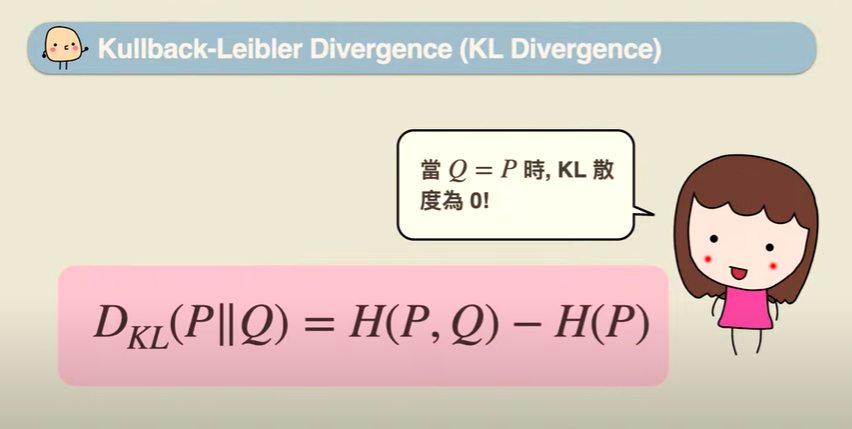


關於 KL Divergence 一樣以假鞋為例我用更直觀的方式解釋，

假設現在有兩間鞋店，一間是Nike直營店，一間是盜版鞋店，

當盜版鞋店的每一種款式顏色的數量比例，完全都跟Nike直營店一樣，那麼KL Divergence 就是 0，代表完全沒差異。

但如果你的店裡某些鞋子比較多、某些比較少，例如限量款特別充裕，那麼這時候的 KL Divergence 就會越大，


代表「盜版鞋店和正版鞋店差距很明顯」，很容易被發現是盜版。


# 3.以程式說明

(由chatGPT協助生成)以上面舉例範本為主

In [ ]:
import numpy as np
import pandas as pd

# 正版鞋特徵分布
real_shoes = np.array([0.7, 0.2, 0.1])

# 高品質盜版鞋 (接近正版鞋)
high_quality_fake = np.array([0.68, 0.22, 0.1])

# 低品質盜版鞋 (與正版鞋差距大)
low_quality_fake = np.array([0.2, 0.5, 0.3])

# Cross Entropy 計算函數
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

# KL Divergence 計算函數
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

# 計算結果
results = {

    '比較對象': ['正版鞋 vs 正版鞋 (完全相同)', '正版鞋 vs 高品質盜版鞋', '正版鞋 vs 低品質盜版鞋'],
    '     Cross Entropy (越小越好) ': [
        cross_entropy(real_shoes, real_shoes),
        cross_entropy(real_shoes, high_quality_fake),
        cross_entropy(real_shoes, low_quality_fake)
    ],
    '     KL Divergence (越小越好) ': [
        kl_divergence(real_shoes, real_shoes),
        kl_divergence(real_shoes, high_quality_fake),
        kl_divergence(real_shoes, low_quality_fake)
    ]
}

# 轉換為DataFrame並印出來
df_results = pd.DataFrame(results)
print(df_results)


                比較對象       Cross Entropy (越小越好)        KL Divergence (越小越好) 
0  正版鞋 vs 正版鞋 (完全相同)                    0.801819                    0.000000
1      正版鞋 vs 高品質盜版鞋                    0.803048                    0.001229
2      正版鞋 vs 低品質盜版鞋                    1.385633                    0.583815


# 4. 總結差異與用途：
**Cross Entropy** :



*   用來衡量單一雙鞋與正版鞋的「真假辨識」誤差。
*   常用於個別判斷（例如判定某雙鞋是否為正版）。
*   數值越小，表示該鞋與正版鞋越像，越難辨識。








**KL Divergence** :



*   衡量整體所有盜版鞋與正版鞋的特徵比例差距。
*   主要用於分析整體分布的相似度（e.g.看所有仿冒鞋與正版鞋的整體配置比例是否接近）。
*   數值越小，表示整體盜版鞋與正版鞋的特徵越接近。






**在模型訓練上，這兩個指標都是愈小愈好。**